In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

In [3]:
# Loads in the corrected beam data and both of the slit data
slit_data   = np.loadtxt("..\\01-Data\master_data\master_single_slit.csv", delimiter=",")
slit_F_data = np.loadtxt("..\\01-Data\master_data\master_single_slit_F.csv", delimiter=",")
beam_data   = np.loadtxt("..\\01-Data\Final_data\corrected_data.csv", delimiter=",")

In [14]:
# Sets up the x and y axes from the header data for the
# fourier plane data
dim_y_F, dim_x_F = slit_F_data.shape
# Pixel dimensions
x_pix_F = np.arange(0,448,1)
y_pix_F = np.arange(0,338,1)

# Physical dimensions
dx = 6.45 # micrometers
dy = 6.45 # micrometers
xf = (x_pix_F * dx) / 1e3 #mm
yf = (y_pix_F * dy) / 1e3 #mm

# Sets up the x and y axes from the header data for the
# image plane data
dim_y, dim_x = slit_data.shape
# Pixel dimensions
x_pix = np.arange(0,1360,1)
y_pix = np.arange(0,1024,1)

# Physical dimensions
dx = 6.45 # micrometers
dy = 6.45 # micrometers
x = (x_pix * dx) / 1e3 #mm
y = (y_pix * dy) / 1e3 #mm

We can plot out both the image plane and the fourier plane. Note both are normalized by the max intensity in the fourier plane

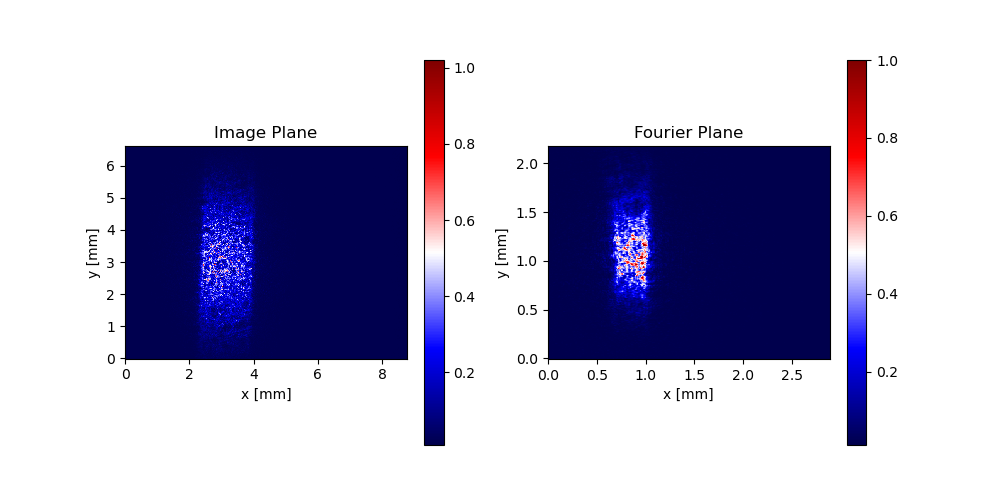

In [27]:
# Plots the beam map in the image plane and the fourier plane
cmap = 'seismic'
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Image Plane
map1 = ax1.pcolormesh(x, y, slit_data / np.max(slit_F_data), cmap=cmap)
cbar1 = fig.colorbar(map1, ax=ax1, orientation='vertical')
ax1.set_title("Image Plane")
ax1.set_xlabel("x [mm]")
ax1.set_ylabel("y [mm]")
ax1.set_aspect('equal')


# Fourier Plane
map2 = ax2.pcolormesh(xf, yf, slit_F_data / np.max(slit_F_data), cmap=cmap)
cbar2 = fig.colorbar(map2, ax=ax2, orientation='vertical')
ax2.set_title("Fourier Plane")
ax2.set_xlabel("x [mm]")
ax2.set_ylabel("y [mm]")
ax2.set_aspect('equal')

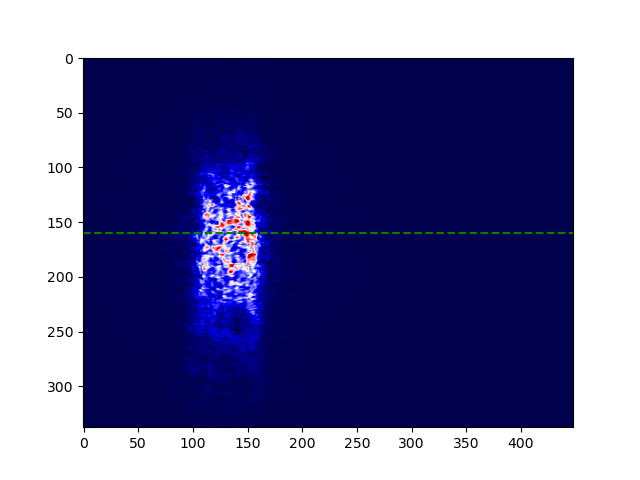

In [30]:
fig,ax = plt.subplots()
ax.imshow(slit_F_data, cmap=cmap)
ax.axhline(160, color='g', linestyle = '--')

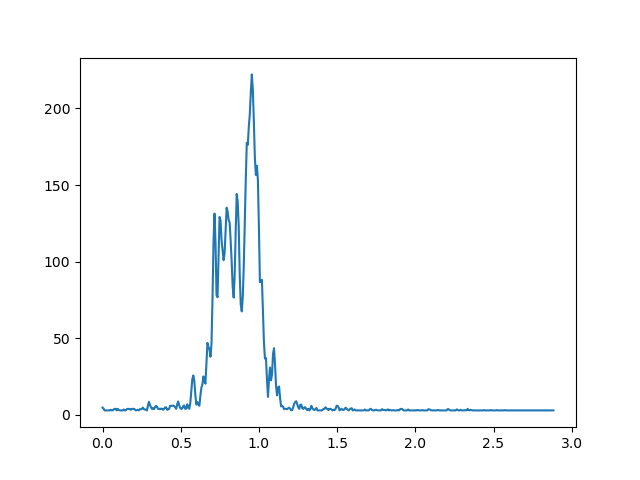

In [31]:
iy = 160
dat = slit_F_data[iy,:]
fig,ax = plt.subplots()
ax.plot(xf,dat)